# Mental Health matters, always and everywhere

## Introduction

In this jupyter notebook I will explore the data that was found on Kaggle about Mental Health. The data consists of several factors, such as countries, years, mental and substance use, prevalence of depression and so on. This dataset will mainly be used to learn more skills, such as plotting data on world map and more useful and easy to read and understand visualisations.


### Geospatial Data Visualisation
Geographic data is a subset of Data Science that deals with location-based data. Geo data is important nowadays, since most businesses and applications revolve around the location element. Visualisations can be important to derive faster insights from location-based datasets.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import folium

In [12]:
prevalence_depression = pd.read_csv('/Users/Roz/Documents/mental_health_project/data/prevalence-of-depression-males-vs-females.csv')
prevalence_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56395 entries, 0 to 56394
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             56395 non-null  object 
 1   Code                                                                               54079 non-null  object 
 2   Year                                                                               56395 non-null  int64  
 3   Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)    6840 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)  6840 non-null   float64
 5   Population (historical estimates)                                                  55656 non-null  floa

In [14]:
prevalence_depression = prevalence_depression.rename(columns={"Entity":"Country", "Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)": "Prevalence_depr_male",
                        "Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)" : "Prevalence_depr_female", "Population (historical estimates)": "Population_estimate"})

prevalence_depression.head()

,Country,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,NaN
2,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,NaN
3,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,NaN
4,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,NaN


In [15]:
prevalence_depression.isnull().sum()

Country                       0
Code                       2316
Year                          0
Prevalence_depr_male      49555
Prevalence_depr_female    49555
Population_estimate         739
Continent                 56110
dtype: int64

In [16]:
prevalence_depression = prevalence_depression.drop(['Continent', 'Code'], axis = 1) #delete unnecessary columns
prevalence_depression.dropna(how='any', inplace=True)

In [17]:
prevalence_depression.isnull().sum()

Country                   0
Year                      0
Prevalence_depr_male      0
Prevalence_depr_female    0
Population_estimate       0
dtype: int64

In [64]:
import geopandas as gpd

# access built-in Natural Earth data via GeoPandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Get a list (dataframe) of country centroids
# centroids = world.centroid
# centroid_list = pd.concat([world.name, centroids], axis=1)

# centroid_list
# # Plot the results
# base = world.plot(column = 'name', cmap = 'Blues')
# centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [65]:
world = world[['geometry','name']].copy()
world.head()

,geometry,name
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [66]:
world = world.rename(columns={0:"geometry", 'name':'Country'})
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  177 non-null    geometry
 1   Country   177 non-null    object  
dtypes: geometry(1), object(1)
memory usage: 2.9+ KB


In [67]:
# centroid_list[['x_cor', 'y_cor']] = centroid_list.coordinates.str.split("(", expand = True) ignore

mergedDF = pd.merge(prevalence_depression, world, on = "Country")

mergedDF
#mergedDF.isnull().sum() # check whether there are null values

,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry
0,Afghanistan,1990,4.291054,5.859656,12412311.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Afghanistan,1991,4.293268,5.853078,13299016.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,Afghanistan,1992,4.298265,5.850020,14485543.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,Afghanistan,1993,4.303087,5.844987,15816601.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,Afghanistan,1994,4.306053,5.843623,17075728.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
...,...,...,...,...,...,...
4735,Zimbabwe,2015,3.090039,3.927306,13814642.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
4736,Zimbabwe,2016,3.094447,3.938356,14030338.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
4737,Zimbabwe,2017,3.097194,3.946231,14236599.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
4738,Zimbabwe,2018,3.092207,3.947673,14438812.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [68]:
mergedDF.describe() # The standard deviation is a measure that tells how spread out a group of numbers in a dataset are

,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate
count,4740.000000,4740.000000,4740.000000,4.740000e+03
mean,2004.500000,3.174508,4.798148,3.858892e+07
std,8.656355,0.847250,1.176886,1.404568e+08
min,1990.000000,1.313565,1.962957,5.560400e+04
25%,1997.000000,2.603879,3.904168,3.625902e+06
50%,2004.500000,3.148444,4.835156,9.583242e+06
75%,2012.000000,3.676174,5.554892,2.638706e+07
max,2019.000000,7.258704,8.977151,1.433784e+09


<function matplotlib.pyplot.show(close=None, block=None)>

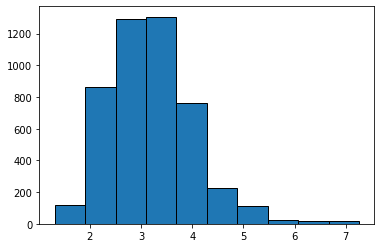

In [69]:
plt.hist(mergedDF['Prevalence_depr_male'], edgecolor="black")
plt.show

# plt.boxplot(mergedDF['Prevalence_depr_male'])
# plt.show

In [70]:
def prev_categorized (row):
    if row['Prevalence_depr_male'] >= 3.676174 :
        return 'high'
    elif row['Prevalence_depr_male'] >= 2.603879 :
        return 'moderate'
    else:
        return 'low'

mergedDF.apply(lambda row: prev_categorized(row), axis=1)

0           high
1           high
2           high
3           high
4           high
          ...   
4735    moderate
4736    moderate
4737    moderate
4738    moderate
4739    moderate
Length: 4740, dtype: object

In [71]:
mergedDF['Prevalence_male'] = mergedDF.apply(lambda row: prev_categorized(row), axis=1)
mergedDF

,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Prevalence_male
0,Afghanistan,1990,4.291054,5.859656,12412311.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high
1,Afghanistan,1991,4.293268,5.853078,13299016.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high
2,Afghanistan,1992,4.298265,5.850020,14485543.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high
3,Afghanistan,1993,4.303087,5.844987,15816601.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high
4,Afghanistan,1994,4.306053,5.843623,17075728.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high
...,...,...,...,...,...,...,...
4735,Zimbabwe,2015,3.090039,3.927306,13814642.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",moderate
4736,Zimbabwe,2016,3.094447,3.938356,14030338.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",moderate
4737,Zimbabwe,2017,3.097194,3.946231,14236599.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",moderate
4738,Zimbabwe,2018,3.092207,3.947673,14438812.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",moderate


In [77]:
def prev_categorized (row):
    if row['Prevalence_depr_female'] >= 3.676174 :
        return 'high'
    elif row['Prevalence_depr_female'] >= 2.603879 :
        return 'moderate'
    else:
        return 'low'

mergedDF['Prevalence_female'] = mergedDF.apply(lambda row: prev_categorized(row), axis=1)
mergedDF

,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Prevalence_male,Prevalence_female
0,Afghanistan,1990,4.291054,5.859656,12412311.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
1,Afghanistan,1991,4.293268,5.853078,13299016.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
2,Afghanistan,1992,4.298265,5.850020,14485543.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
3,Afghanistan,1993,4.303087,5.844987,15816601.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
4,Afghanistan,1994,4.306053,5.843623,17075728.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
...,...,...,...,...,...,...,...,...
4735,Zimbabwe,2015,3.090039,3.927306,13814642.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",moderate,high
4736,Zimbabwe,2016,3.094447,3.938356,14030338.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",moderate,high
4737,Zimbabwe,2017,3.097194,3.946231,14236599.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",moderate,high
4738,Zimbabwe,2018,3.092207,3.947673,14438812.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",moderate,high


<AxesSubplot:>

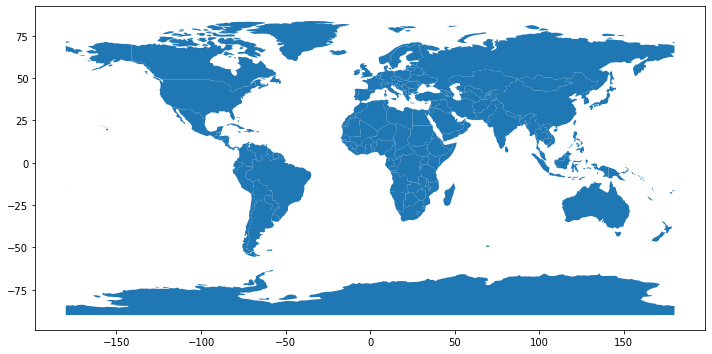

In [73]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
# world.head()

world.plot(figsize=(12,8))

Text(0.5, 1.0, 'Prevalence Depression in Male')

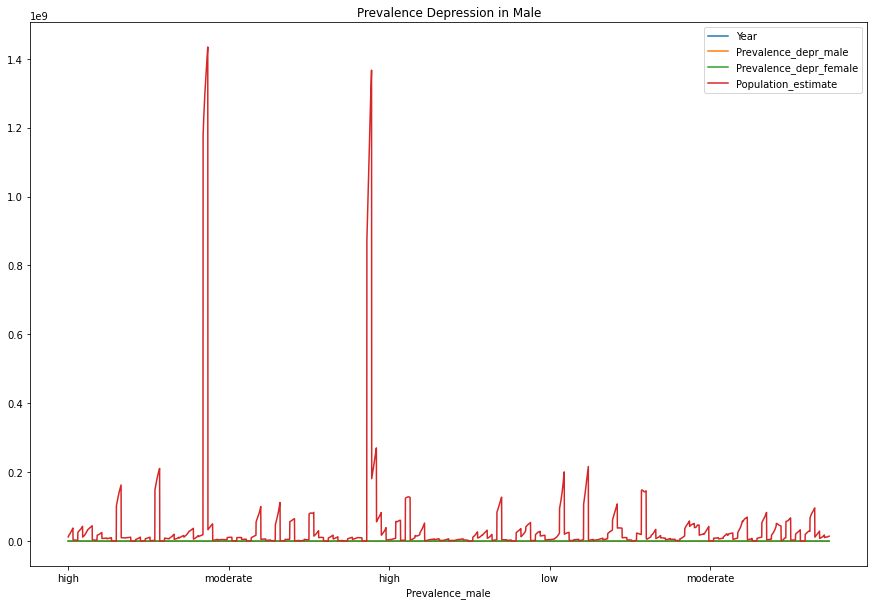

In [74]:
mergedDF.plot("Prevalence_male", figsize=(15,10))
plt.title("Prevalence Depression in Male")

In [78]:
gdf = geopandas.GeoDataFrame(mergedDF)

gdf.head()

,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Prevalence_male,Prevalence_female
0,Afghanistan,1990,4.291054,5.859656,12412311.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
1,Afghanistan,1991,4.293268,5.853078,13299016.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
2,Afghanistan,1992,4.298265,5.850020,14485543.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
3,Afghanistan,1993,4.303087,5.844987,15816601.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
4,Afghanistan,1994,4.306053,5.843623,17075728.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high


In [79]:
prev_depression_2010 = mergedDF.loc[mergedDF['Year'] == 2010]
prev_depression_2010

,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Prevalence_male,Prevalence_female
20,Afghanistan,2010,4.367764,5.814176,29185511.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
50,Albania,2010,1.758570,3.412655,2948029.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",low,moderate
80,Algeria,2010,3.415773,5.124895,35977451.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",moderate,high
110,Angola,2010,4.957225,6.626335,23356247.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",high,high
140,Argentina,2010,2.002276,3.119741,40895751.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",low,moderate
...,...,...,...,...,...,...,...,...
4610,Venezuela,2010,2.771534,3.829454,28439942.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...",moderate,high
4640,Vietnam,2010,1.906991,3.183058,87967655.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",low,moderate
4670,Yemen,2010,3.958559,6.079693,23154854.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",high,high
4700,Zambia,2010,3.573750,4.701585,13605986.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",moderate,high


In [80]:
gdf = gpd.GeoDataFrame(prev_depression_2010)
gdf.head()


,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Prevalence_male,Prevalence_female
20,Afghanistan,2010,4.367764,5.814176,29185511.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",high,high
50,Albania,2010,1.758570,3.412655,2948029.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",low,moderate
80,Algeria,2010,3.415773,5.124895,35977451.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",moderate,high
110,Angola,2010,4.957225,6.626335,23356247.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",high,high
140,Argentina,2010,2.002276,3.119741,40895751.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",low,moderate


Text(0.5, 1.0, 'test world map')

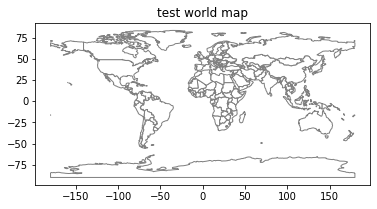

In [82]:
g = world.plot(color='white', edgecolor='gray')
g.set_title("test world map")

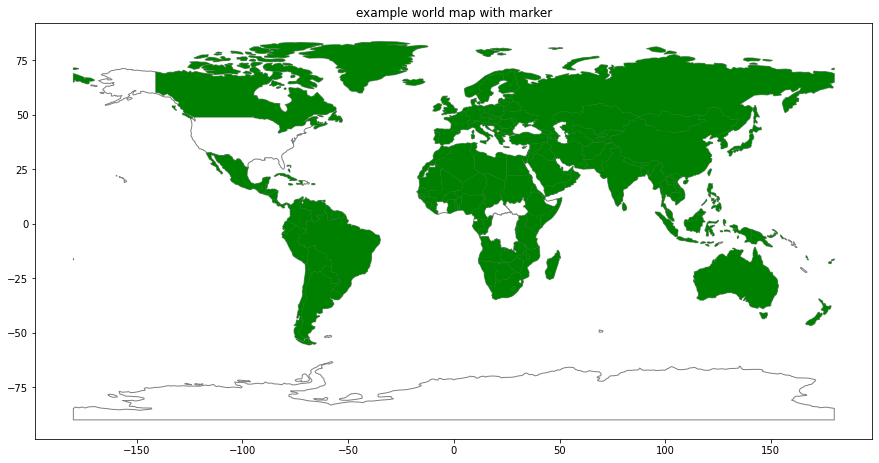

In [84]:
ax = world.plot(color='white', edgecolor='gray', figsize=(15, 10))
g = gdf.plot(ax=ax, color='green', markersize=50)
g.set_title("example world map with marker")
plt.show()

In [ ]:
# test = prev_depression_2010[['geometry','Prevalence_depr_male']].copy()
# test.info()

In [ ]:
# test['Prevalence_depr_male'] = test['Prevalence_depr_male'].astype(int)
# test.info()
# test.plot("Prevalence_depr_male", figsize=(15,10))
# plt.title("Prevalence Depression in Male")